In [1]:
import pandas as pd

In [4]:
dataset=pd.read_csv("data2awswithscore.csv")

In [13]:
dataset.columns

Index(['text', 'score'], dtype='object')

In [12]:
dataset

,text,score
0,الذكاء الاصطناعي (AI) هو مجال علوم الكمبيوتر ا...,10
1,المعرفية المرتبطة عادةً بالذكاء البشري، مثل ال...,8
2,الصور. تجمع المؤسسات الحديثة كمياتٍ كبيرةً من ...,2
3,متنوعة مثل أجهزة الاستشعار الذكية والمحتوى الذ...,7
4,المراقبة وسجلات النظام. الهدف من الذكاء الاصطن...,9
...,...,...
231,الاصطناعي وتوسعة نطاقها لكل نوع من حالات الاست...,7
232,أمثلة على خدمات AWS التي يُمكنك استخدامها:,7
233,ابدأ اليوم استخدام الذكاء الاصطناعي على AWS عن...,7
234,تمتع بالوصول الفوري إلى الطبقة المجانية من AWS.,7


In [16]:
!pip install farasa


In [19]:
!pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.1/781.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.5 MB/s eta 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import nltk
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
import string
from nltk.corpus import stopwords
import re

In [24]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
dataset= pd.read_csv('d1.csv')
dataset.head()

,text;score
0,الذكاء الاصطناعي (AI) هو مجال علوم الكمبيوتر ا...
1,المعرفية المرتبطة عادةً بالذكاء البشري، مثل ال...
2,الصور. تجمع المؤسسات الحديثة كمياتٍ كبيرةً من ...
3,متنوعة مثل أجهزة الاستشعار الذكية والمحتوى الذ...
4,المراقبة وسجلات النظام. الهدف من الذكاء الاصطن...


In [27]:
dataset.columns

Index(['text;score'], dtype='object')

In [28]:
dataset[['text', 'score']] = dataset['text;score'].str.split(';', expand=True)

dataset.drop(columns=['text;score'], inplace=True)

In [29]:
dataset.columns

Index(['text', 'score'], dtype='object')

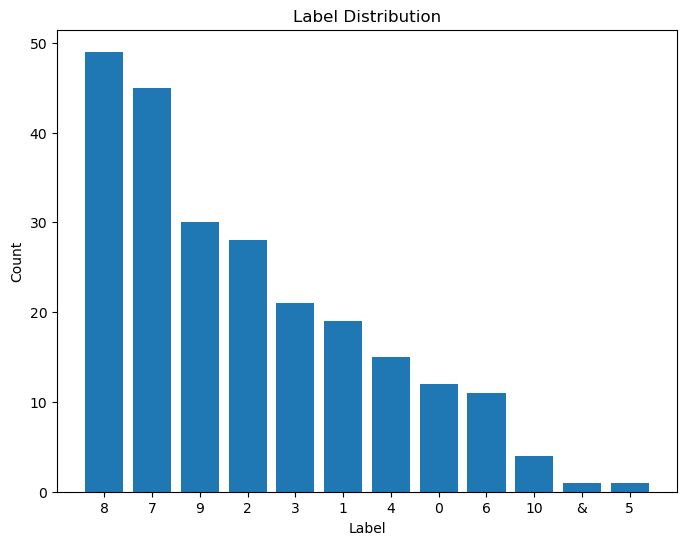

In [30]:
label_counts = dataset['score'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

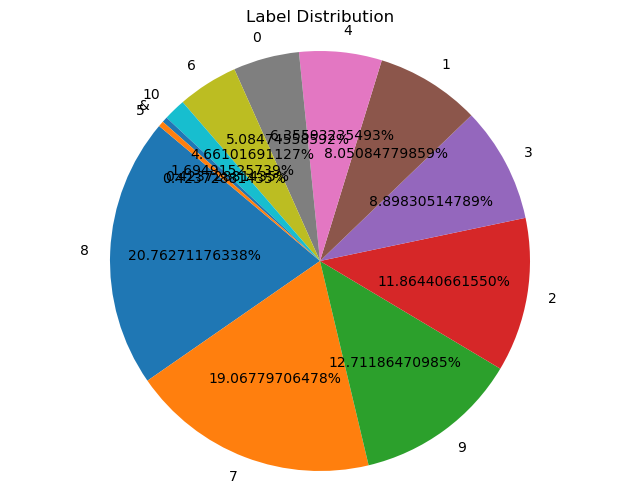

In [32]:
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.11f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')
plt.show()

In [33]:
def is_valid_score(score):
    try:
        # If there are characters present, try to extract the numeric part
        numeric_score = re.search(r'\d+\.*\d*', score).group()
        numeric_score = float(numeric_score)
        return 0 <= numeric_score <= 10
    except (ValueError, AttributeError):
        return False

# Apply the function to the score column to create a mask of valid scores
valid_scores_mask = dataset['score'].apply(is_valid_score)

# Keep only the rows with valid scores
dataset = dataset[valid_scores_mask]

# Optionally, you can reset the index if you want consecutive row numbers
df.reset_index(drop=True, inplace=True)

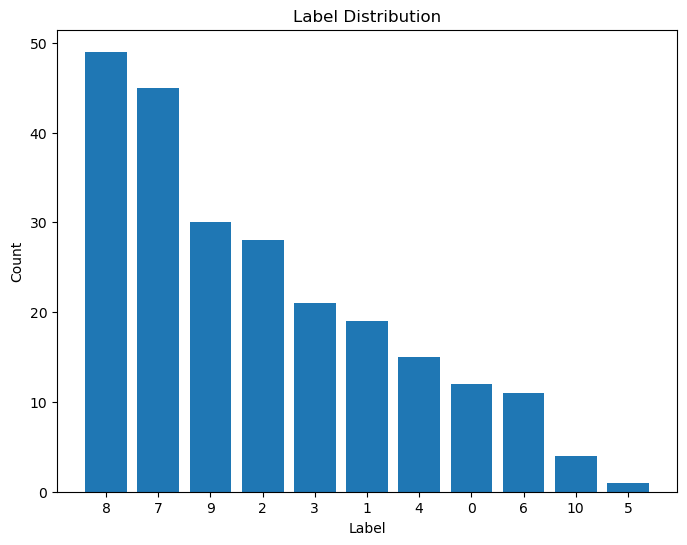

In [34]:
label_counts = dataset['score'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [37]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('arabic'))

def clean_text(text):
    words = word_tokenize(text)
    filtered_text = [word for word in words if word not in stop_words]
    return ' '.join(filtered_text)


In [38]:
dataset['text'] = dataset['text'].apply(clean_text)

In [39]:
dataset

,text,score
0,الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ال...,10
1,المعرفية المرتبطة عادةً بالذكاء البشري، التعلم...,8
2,الصور . تجمع المؤسسات الحديثة كمياتٍ كبيرةً ال...,2
3,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,7
4,المراقبة وسجلات النظام . الهدف الذكاء الاصطناع...,9
...,...,...
231,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,7
232,أمثلة خدمات AWS يُمكنك استخدامها :,7
233,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,7
234,تمتع بالوصول الفوري الطبقة المجانية AWS .,7


In [40]:
!pip install farasa


In [45]:
import pyarabic.araby as araby
tokenized_texts = []
sentence_tokenized_texts = []

for text in dataset['text']:
    # Tokenize words
    tokens = araby.tokenize(text)
    tokenized_texts.append(tokens)
    
    # Tokenize sentences
    sent_tokens = araby.sentence_tokenize(text)
    sentence_tokenized_texts.append(sent_tokens)

dataset['word_tokenized_text'] = tokenized_texts
dataset['sentence_tokenized_text'] = sentence_tokenized_texts


In [46]:
dataset

,text,score,word_tokenized_text,sentence_tokenized_text
0,الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ال...,10,"[الذكاء, الاصطناعي, (, AI, ), مجال, علوم, الكم...",[الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ا...
1,المعرفية المرتبطة عادةً بالذكاء البشري، التعلم...,8,"[المعرفية, المرتبطة, عادةً, بالذكاء, البشري, ،...","[المعرفية المرتبطة عادةً بالذكاء البشري،, التع..."
2,الصور . تجمع المؤسسات الحديثة كمياتٍ كبيرةً ال...,2,"[الصور, ., تجمع, المؤسسات, الحديثة, كمياتٍ, كب...","[الصور ., تجمع المؤسسات الحديثة كمياتٍ كبيرةً ..."
3,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,7,"[متنوعة, أجهزة, الاستشعار, الذكية, والمحتوى, ي...",[متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ...
4,المراقبة وسجلات النظام . الهدف الذكاء الاصطناع...,9,"[المراقبة, وسجلات, النظام, ., الهدف, الذكاء, ا...","[المراقبة وسجلات النظام ., الهدف الذكاء الاصطن..."
...,...,...,...,...
231,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,7,"[الاصطناعي, وتوسعة, نطاقها, لكل, نوع, حالات, ا...",[الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخد...
232,أمثلة خدمات AWS يُمكنك استخدامها :,7,"[أمثلة, خدمات, AWS, يُمكنك, استخدامها, :]",[أمثلة خدمات AWS يُمكنك استخدامها :]
233,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,7,"[ابدأ, اليوم, استخدام, الذكاء, الاصطناعي, AWS,...",[ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإ...
234,تمتع بالوصول الفوري الطبقة المجانية AWS .,7,"[تمتع, بالوصول, الفوري, الطبقة, المجانية, AWS, .]",[تمتع بالوصول الفوري الطبقة المجانية AWS .]


In [47]:
import re
ar_punct = ''')(+`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”،.”…“–ـ”.'''
en_punct = string.punctuation
punct_lst = ar_punct + en_punct

# Function to remove punctuation from text
def remove_punctuation(text):
    return re.sub('[' + re.escape(punct_lst) + ']', '', text)

# Apply the function to the text column in your dataset
dataset['cleaned_text'] = dataset['text'].apply(remove_punctuation)

In [48]:
dataset

,text,score,word_tokenized_text,sentence_tokenized_text,cleaned_text
0,الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ال...,10,"[الذكاء, الاصطناعي, (, AI, ), مجال, علوم, الكم...",[الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ا...,الذكاء الاصطناعي AI مجال علوم الكمبيوتر المخ...
1,المعرفية المرتبطة عادةً بالذكاء البشري، التعلم...,8,"[المعرفية, المرتبطة, عادةً, بالذكاء, البشري, ،...","[المعرفية المرتبطة عادةً بالذكاء البشري،, التع...",المعرفية المرتبطة عادةً بالذكاء البشري التعلم ...
2,الصور . تجمع المؤسسات الحديثة كمياتٍ كبيرةً ال...,2,"[الصور, ., تجمع, المؤسسات, الحديثة, كمياتٍ, كب...","[الصور ., تجمع المؤسسات الحديثة كمياتٍ كبيرةً ...",الصور تجمع المؤسسات الحديثة كمياتٍ كبيرةً الب...
3,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,7,"[متنوعة, أجهزة, الاستشعار, الذكية, والمحتوى, ي...",[متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ...,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...
4,المراقبة وسجلات النظام . الهدف الذكاء الاصطناع...,9,"[المراقبة, وسجلات, النظام, ., الهدف, الذكاء, ا...","[المراقبة وسجلات النظام ., الهدف الذكاء الاصطن...",المراقبة وسجلات النظام الهدف الذكاء الاصطناعي...
...,...,...,...,...,...
231,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,7,"[الاصطناعي, وتوسعة, نطاقها, لكل, نوع, حالات, ا...",[الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخد...,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...
232,أمثلة خدمات AWS يُمكنك استخدامها :,7,"[أمثلة, خدمات, AWS, يُمكنك, استخدامها, :]",[أمثلة خدمات AWS يُمكنك استخدامها :],أمثلة خدمات AWS يُمكنك استخدامها
233,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,7,"[ابدأ, اليوم, استخدام, الذكاء, الاصطناعي, AWS,...",[ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإ...,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...
234,تمتع بالوصول الفوري الطبقة المجانية AWS .,7,"[تمتع, بالوصول, الفوري, الطبقة, المجانية, AWS, .]",[تمتع بالوصول الفوري الطبقة المجانية AWS .],تمتع بالوصول الفوري الطبقة المجانية AWS


In [50]:
from tashaphyne.stemming import ArabicLightStemmer

# Initialize the Arabic light stemmer
stemmer = ArabicLightStemmer()

# Stem the tokens
stemmed_tokens = [stemmer.light_stem(token) for token in tokens]

# Print the stemmed tokens
print("Stemmed token list: ", stemmed_tokens)


Stemmed token list:  ['دء', 'إنشاء', 'حد', 'إدار', 'حكم', 'AWS', '.']


In [52]:
import qalsadi.lemmatizer as lem
lemmer = lem.Lemmatizer()
lemmatized_tokens = [lemmer.lemmatize(token) for token in tokens]
print("Lemmatized token list: ", lemmatized_tokens)

Lemmatized token list:  ['بدء', 'إنشاء', 'وحد', 'إدارة', 'تحكم', 'AWS', '.']


In [54]:
import re
from nltk.tokenize import word_tokenize
import qalsadi.lemmatizer as lem

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Initialize the lemmatizer
lemmatizer = lem.Lemmatizer()

# Assuming 'text_column' contains the Arabic text data in your dataset
# 'dataset' is your dataset
lemmatized_tokens = []

for text in dataset['text']:
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    
    # Tokenize the text
    tokens = word_tokenize(preprocessed_text)
    
    # Lemmatize each token
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Append the lemmatized tokens to the list
    lemmatized_tokens.append(lemmas)

# Add the lemmatized tokens to your dataset
dataset['lemmatized_text'] = lemmatized_tokens


In [56]:
dataset['lemmatized_text']

0      [ذكاء, اصطناع, AI, مجال, علوم, كمبيوتر, مخصص, ...
1      [معرفة, مرتبط, عاد, ذكاء, بشر, تعلم, إبداع, تعرف]
2         [صور, تجمع, مؤسس, حديث, كم, كبير, بيان, مصادر]
3      [متنوع, أجهزة, استشعار, ذكي, محتوى, أنشأ, إنس,...
4      [مراقب, سجل, نظام, هدف, ذكاء, اصطناع, إنشاء, نظم]
                             ...                        
231     [اصطناع, توسع, نطاق, كل, نوع, حال, استخدام, ولى]
232                      [مثل, خدمة, AWS, أمكن, استخدام]
233    [بدأ, يوم, استخدام, ذكاء, اصطناع, AWS, طريقإنش...
234                    [تمتع, وصول, فور, طبق, مجان, AWS]
235                  [بدء, إنشاء, وحد, إدارة, تحكم, AWS]
Name: lemmatized_text, Length: 235, dtype: object

In [67]:
!pip install farasapy

In [77]:
from farasa.segmenter import FarasaSegmenter

# Initialize Farasa Segmenter
segmenter = FarasaSegmenter(interactive=True)

# Function to perform spell checking
def spell_check(text):
    # Split the text into tokens
    tokens = text.split('  ')
    # Segment each token
    segmented_tokens = [segmenter.segment(token) for token in tokens]
    # Join the segmented tokens back into a string with no spaces
    corrected_text = ''.join([''.join(segmented_token) for segmented_token in segmented_tokens])
    return corrected_text

# Assuming 'text' is the column containing Arabic text in your dataset
# 'dataset' is your dataset
corrected_text = dataset['text'].apply(spell_check)

# Add the corrected text back to your dataset
dataset['corrected_text'] = corrected_text


[2024-05-24 00:00:27,241 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [73]:
dataset

,text,score,word_tokenized_text,sentence_tokenized_text,cleaned_text,lemmatized_text,corrected_text
0,الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ال...,10,"[الذكاء, الاصطناعي, (, AI, ), مجال, علوم, الكم...",[الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ا...,الذكاء الاصطناعي AI مجال علوم الكمبيوتر المخ...,"[ذكاء, اصطناع, AI, مجال, علوم, كمبيوتر, مخصص, ...",ا ل + ذ ك ا ء ا ل + ا ص ط ن ا ع ي ( A I ...
1,المعرفية المرتبطة عادةً بالذكاء البشري، التعلم...,8,"[المعرفية, المرتبطة, عادةً, بالذكاء, البشري, ،...","[المعرفية المرتبطة عادةً بالذكاء البشري،, التع...",المعرفية المرتبطة عادةً بالذكاء البشري التعلم ...,"[معرفة, مرتبط, عاد, ذكاء, بشر, تعلم, إبداع, تعرف]",ا ل + م ع ر ف ي + ة ا ل + م ر ت ب ط + ة ع ...
2,الصور . تجمع المؤسسات الحديثة كمياتٍ كبيرةً ال...,2,"[الصور, ., تجمع, المؤسسات, الحديثة, كمياتٍ, كب...","[الصور ., تجمع المؤسسات الحديثة كمياتٍ كبيرةً ...",الصور تجمع المؤسسات الحديثة كمياتٍ كبيرةً الب...,"[صور, تجمع, مؤسس, حديث, كم, كبير, بيان, مصادر]",ا ل + ص و ر . ت ج م ع ا ل + م ؤ س س + ا ...
3,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,7,"[متنوعة, أجهزة, الاستشعار, الذكية, والمحتوى, ي...",[متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ...,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,"[متنوع, أجهزة, استشعار, ذكي, محتوى, أنشأ, إنس,...",م ت ن و ع + ة أ ج ه ز + ة ا ل + ا س ت ش ع ...
4,المراقبة وسجلات النظام . الهدف الذكاء الاصطناع...,9,"[المراقبة, وسجلات, النظام, ., الهدف, الذكاء, ا...","[المراقبة وسجلات النظام ., الهدف الذكاء الاصطن...",المراقبة وسجلات النظام الهدف الذكاء الاصطناعي...,"[مراقب, سجل, نظام, هدف, ذكاء, اصطناع, إنشاء, نظم]",ا ل + م ر ا ق ب + ة و + س ج ل + ا ت ا ل + ...
...,...,...,...,...,...,...,...
231,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,7,"[الاصطناعي, وتوسعة, نطاقها, لكل, نوع, حالات, ا...",[الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخد...,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,"[اصطناع, توسع, نطاق, كل, نوع, حال, استخدام, ولى]",ا ل + ا ص ط ن ا ع ي و + ت و س ع + ة ن ط ا ...
232,أمثلة خدمات AWS يُمكنك استخدامها :,7,"[أمثلة, خدمات, AWS, يُمكنك, استخدامها, :]",[أمثلة خدمات AWS يُمكنك استخدامها :],أمثلة خدمات AWS يُمكنك استخدامها,"[مثل, خدمة, AWS, أمكن, استخدام]",أ م ث ل + ة خ د م + ا ت A W S ي م ك ن + ...
233,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,7,"[ابدأ, اليوم, استخدام, الذكاء, الاصطناعي, AWS,...",[ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإ...,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,"[بدأ, يوم, استخدام, ذكاء, اصطناع, AWS, طريقإنش...",ا ب د أ ا ل + ي و م ا س ت خ د ا م ا ل + ...
234,تمتع بالوصول الفوري الطبقة المجانية AWS .,7,"[تمتع, بالوصول, الفوري, الطبقة, المجانية, AWS, .]",[تمتع بالوصول الفوري الطبقة المجانية AWS .],تمتع بالوصول الفوري الطبقة المجانية AWS,"[تمتع, وصول, فور, طبق, مجان, AWS]",ت م ت ع ب + ا ل + و ص و ل ا ل + ف و ر ي ...


In [78]:
dataset['corrected_text']

0      ال+ذكاء ال+اصطناعي ( AI ) مجال علوم ال+كمبيوتر...
1      ال+معرفي+ة ال+مرتبط+ة عاد+ة ب+ال+ذكاء ال+بشري ...
2      ال+صور . تجمع ال+مؤسس+ات ال+حديث+ة كمي+ات كبير...
3      متنوع+ة أجهز+ة ال+استشعار ال+ذكي+ة و+ال+محتوى ...
4      ال+مراقب+ة و+سجل+ات ال+نظام . ال+هدف ال+ذكاء ا...
                             ...                        
231    ال+اصطناعي و+توسع+ة نطاق+ها ل+كل نوع حال+ات ال...
232                أمثل+ة خدم+ات AWS يمكن+ك استخدام+ها :
233    ابدأ ال+يوم استخدام ال+ذكاء ال+اصطناعي AWS طري...
234     تمتع ب+ال+وصول ال+فوري ال+طبق+ة ال+مجاني+ة AWS .
235                 بدء ال+إنشاء وحد+ة إدار+ة تحكم AWS .
Name: corrected_text, Length: 235, dtype: object

In [79]:
dataset.columns

Index(['text', 'score', 'word_tokenized_text', 'sentence_tokenized_text',
       'cleaned_text', 'lemmatized_text', 'corrected_text'],
      dtype='object')

In [84]:
segmenter = FarasaSegmenter(interactive=False)


In [92]:
def ponctuation(phrase):
    phrase2=" "
    arabic_punctuations = '''`.‏،÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    english_punctuations = string.punctuation
    punctuations_list = arabic_punctuations + english_punctuations
    newPhrase=phrase.translate(str.maketrans(punctuations_list, ' '*len(punctuations_list)))
    newPhrase=re.sub('[0-9]',' ',phrase)
    newPhrase=re.sub('[\n,\t,\r,\n\n,\u200f]',' ',newPhrase)
    liste=newPhrase.split()
    return phrase2.join(liste)

In [93]:
def ponc_noarabic(text):
    p=" "
    COMMA            = u'\u060C'
    SEMICOLON        = u'\u061B'
    QUESTION         = u'\u061F'
    HAMZA            = u'\u0621'
    ALEF_MADDA       = u'\u0622'
    ALEF_HAMZA_ABOVE = u'\u0623'
    list1=tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
    unwanted_num = {COMMA,SEMICOLON,QUESTION,HAMZA,ALEF_MADDA,ALEF_HAMZA_ABOVE}
    list1 = [ele for ele in list1 if ele not in unwanted_num]
    return p.join(list1)

In [94]:
def clean_data(phrase):
    phrase2= " ";a=[]
    newPhrase=phrase.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    newPhrase=re.sub('[0-9]',' ',newPhrase)
    liste=newPhrase.split()
    stops = set(stopwords.words('arabic'))
    stops={i.translate(str.maketrans("'"," ",string.punctuation)) for i in stops}
    p=["لكن","لا","لم"]
    stop=stops.difference(p)
    for i in liste:
        if i not in stop and i not in a:
            a.append(i)
    return phrase2.join(a)

In [95]:
def arabic_clean(text):
    text=ponctuation(text)
    text=ponc_noarabic(text)
    text=clean_data(text)
    return text

In [97]:
dataset['T1'] =dataset['text'].apply(lambda x: arabic_clean(x))

In [98]:
dataset['T1']

0      الذكاء الاصطناعي مجال علوم الكمبيوتر المخصص لح...
1      المعرفية المرتبطة عادة بالذكاء البشري التعلم و...
2      الصور تجمع المؤسسات الحديثة كميات كبيرة البيان...
3      متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...
4      المراقبة وسجلات النظام الهدف الذكاء الاصطناعي ...
                             ...                        
231    الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...
232                          أمثلة خدمات يمكنك استخدامها
233    ابدأ اليوم استخدام الذكاء الاصطناعي طريقإنشاء ...
234                  تمتع بالوصول الفوري الطبقة المجانية
235                          بدء الإنشاء وحدة إدارة تحكم
Name: T1, Length: 235, dtype: object

In [99]:
dataset

,text,score,word_tokenized_text,sentence_tokenized_text,cleaned_text,lemmatized_text,corrected_text,T1
0,الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ال...,10,"[الذكاء, الاصطناعي, (, AI, ), مجال, علوم, الكم...",[الذكاء الاصطناعي ( AI ) مجال علوم الكمبيوتر ا...,الذكاء الاصطناعي AI مجال علوم الكمبيوتر المخ...,"[ذكاء, اصطناع, AI, مجال, علوم, كمبيوتر, مخصص, ...",ال+ذكاء ال+اصطناعي ( AI ) مجال علوم ال+كمبيوتر...,الذكاء الاصطناعي مجال علوم الكمبيوتر المخصص لح...
1,المعرفية المرتبطة عادةً بالذكاء البشري، التعلم...,8,"[المعرفية, المرتبطة, عادةً, بالذكاء, البشري, ،...","[المعرفية المرتبطة عادةً بالذكاء البشري،, التع...",المعرفية المرتبطة عادةً بالذكاء البشري التعلم ...,"[معرفة, مرتبط, عاد, ذكاء, بشر, تعلم, إبداع, تعرف]",ال+معرفي+ة ال+مرتبط+ة عاد+ة ب+ال+ذكاء ال+بشري ...,المعرفية المرتبطة عادة بالذكاء البشري التعلم و...
2,الصور . تجمع المؤسسات الحديثة كمياتٍ كبيرةً ال...,2,"[الصور, ., تجمع, المؤسسات, الحديثة, كمياتٍ, كب...","[الصور ., تجمع المؤسسات الحديثة كمياتٍ كبيرةً ...",الصور تجمع المؤسسات الحديثة كمياتٍ كبيرةً الب...,"[صور, تجمع, مؤسس, حديث, كم, كبير, بيان, مصادر]",ال+صور . تجمع ال+مؤسس+ات ال+حديث+ة كمي+ات كبير...,الصور تجمع المؤسسات الحديثة كميات كبيرة البيان...
3,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,7,"[متنوعة, أجهزة, الاستشعار, الذكية, والمحتوى, ي...",[متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ...,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...,"[متنوع, أجهزة, استشعار, ذكي, محتوى, أنشأ, إنس,...",متنوع+ة أجهز+ة ال+استشعار ال+ذكي+ة و+ال+محتوى ...,متنوعة أجهزة الاستشعار الذكية والمحتوى ينشئه ا...
4,المراقبة وسجلات النظام . الهدف الذكاء الاصطناع...,9,"[المراقبة, وسجلات, النظام, ., الهدف, الذكاء, ا...","[المراقبة وسجلات النظام ., الهدف الذكاء الاصطن...",المراقبة وسجلات النظام الهدف الذكاء الاصطناعي...,"[مراقب, سجل, نظام, هدف, ذكاء, اصطناع, إنشاء, نظم]",ال+مراقب+ة و+سجل+ات ال+نظام . ال+هدف ال+ذكاء ا...,المراقبة وسجلات النظام الهدف الذكاء الاصطناعي ...
...,...,...,...,...,...,...,...,...
231,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,7,"[الاصطناعي, وتوسعة, نطاقها, لكل, نوع, حالات, ا...",[الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخد...,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...,"[اصطناع, توسع, نطاق, كل, نوع, حال, استخدام, ولى]",ال+اصطناعي و+توسع+ة نطاق+ها ل+كل نوع حال+ات ال...,الاصطناعي وتوسعة نطاقها لكل نوع حالات الاستخدا...
232,أمثلة خدمات AWS يُمكنك استخدامها :,7,"[أمثلة, خدمات, AWS, يُمكنك, استخدامها, :]",[أمثلة خدمات AWS يُمكنك استخدامها :],أمثلة خدمات AWS يُمكنك استخدامها,"[مثل, خدمة, AWS, أمكن, استخدام]",أمثل+ة خدم+ات AWS يمكن+ك استخدام+ها :,أمثلة خدمات يمكنك استخدامها
233,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,7,"[ابدأ, اليوم, استخدام, الذكاء, الاصطناعي, AWS,...",[ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإ...,ابدأ اليوم استخدام الذكاء الاصطناعي AWS طريقإن...,"[بدأ, يوم, استخدام, ذكاء, اصطناع, AWS, طريقإنش...",ابدأ ال+يوم استخدام ال+ذكاء ال+اصطناعي AWS طري...,ابدأ اليوم استخدام الذكاء الاصطناعي طريقإنشاء ...
234,تمتع بالوصول الفوري الطبقة المجانية AWS .,7,"[تمتع, بالوصول, الفوري, الطبقة, المجانية, AWS, .]",[تمتع بالوصول الفوري الطبقة المجانية AWS .],تمتع بالوصول الفوري الطبقة المجانية AWS,"[تمتع, وصول, فور, طبق, مجان, AWS]",تمتع ب+ال+وصول ال+فوري ال+طبق+ة ال+مجاني+ة AWS .,تمتع بالوصول الفوري الطبقة المجانية


In [103]:
!pip install Keras-Preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 894.5 kB/s eta 0:00:00


In [105]:
import tensorflow as tf

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense
from sklearn.model_selection import train_test_split


In [110]:
texts = dataset['T1'].tolist()
scores = dataset['score'].tolist()

In [111]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
scores=lb.fit_transform(scores)

In [112]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(texts)

In [113]:
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, scores, test_size=0.2, random_state=42)

In [115]:
def create_model(architecture):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    if architecture == 'RNN':
        model.add(LSTM(64, dropout=0.2))
    elif architecture == 'Bidirectional_RNN':
        model.add(Bidirectional(LSTM(64, dropout=0.2)))
    elif architecture == 'GRU':
        model.add(GRU(64, dropout=0.2))
    elif architecture == 'LSTM':
        model.add(LSTM(64, dropout=0.2))
    model.add(Dense(1, activation='linear'))
    return model

In [117]:
architectures = ['RNN', 'Bidirectional_RNN', 'GRU', 'LSTM']
for architecture in architectures:
    model = create_model(architecture)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    print(f"Training {architecture} model...")
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{architecture} model - Test Loss: {loss}, Test MAE: {mae}")

Training RNN model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 51.5976 - mae: 6.4555 - val_loss: 36.8799 - val_mae: 5.3452
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.5552 - mae: 6.0728 - val_loss: 30.2335 - val_mae: 4.7544
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.4184 - mae: 4.7198 - val_loss: 21.0706 - val_mae: 3.9207
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.4037 - mae: 3.9446 - val_loss: 12.6886 - val_mae: 3.0930
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1750 - mae: 2.7325 - val_loss: 11.5733 - val_mae: 2.6948
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.2191 - mae: 2.8661 - val_loss: 10.6875 - val_mae: 2.6718
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.0769 - mae: 2.7161 - val_loss: 9.5330 - val_mae: 2.6562
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7132 - mae: 2.7799 - val_loss: 9.1515 - val_mae: 2.6483
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

In [118]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

def create_model(architecture, dropout_rate=0.2, l2_penalty=0.001):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    if architecture == 'RNN':
        model.add(LSTM(64, dropout=dropout_rate, kernel_regularizer=l2(l2_penalty)))
    elif architecture == 'Bidirectional_RNN':
        model.add(Bidirectional(LSTM(64, dropout=dropout_rate, kernel_regularizer=l2(l2_penalty))))
    elif architecture == 'GRU':
        model.add(GRU(64, dropout=dropout_rate, kernel_regularizer=l2(l2_penalty)))
    elif architecture == 'LSTM':
        model.add(LSTM(64, dropout=dropout_rate, kernel_regularizer=l2(l2_penalty)))
    model.add(Dense(1, activation='linear'))
    return model

architectures = ['RNN', 'Bidirectional_RNN', 'GRU', 'LSTM']
for architecture in architectures:
    model = create_model(architecture)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    print(f"Training {architecture} model...")
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{architecture} model - Test Loss: {loss}, Test MAE: {mae}")


Training RNN model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 50.6575 - mae: 6.3086 - val_loss: 36.5688 - val_mae: 5.3067
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.2106 - mae: 5.8334 - val_loss: 29.4615 - val_mae: 4.6653
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 34.0919 - mae: 5.0271 - val_loss: 20.2877 - val_mae: 3.8800
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.6417 - mae: 4.1154 - val_loss: 13.7569 - val_mae: 3.1359
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8646 - mae: 2.9980 - val_loss: 12.9873 - val_mae: 2.7746
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1809 - mae: 2.5966 - val_loss: 10.8263 - val_mae: 2.7011
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0856 - mae: 2.6115 - val_loss: 9.6856 - val_mae: 2.6810
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3605 - mae: 2.7675 - val_loss: 9.5923 - val_mae: 2.6804
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the function to create the model
def create_model(architecture, dropout_rate=0.2, recurrent_dropout=0.2):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    
    if architecture == 'RNN':
        model.add(LSTM(64, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, kernel_regularizer='l2'))
    elif architecture == 'Bidirectional_RNN':
        model.add(Bidirectional(LSTM(64, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, kernel_regularizer='l2')))
    elif architecture == 'GRU':
        model.add(GRU(64, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, kernel_regularizer='l2'))
    elif architecture == 'LSTM':
        model.add(LSTM(64, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, kernel_regularizer='l2'))
    
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='linear'))
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, scores, test_size=0.2, random_state=42)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define hyperparameters
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in sequences)
dropout_rate = 0.4
recurrent_dropout = 0.3

# Train and evaluate the models
architectures = ['RNN', 'Bidirectional_RNN', 'GRU', 'LSTM']
for architecture in architectures:
    model = create_model(architecture, dropout_rate=dropout_rate, recurrent_dropout=recurrent_dropout)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    print(f"Training {architecture} model...")
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{architecture} model - Test Loss: {loss}, Test MAE: {mae}")


Training RNN model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 50.6926 - mae: 6.2118 - val_loss: 42.2430 - val_mae: 5.6424
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.7648 - mae: 6.1786 - val_loss: 41.8188 - val_mae: 5.6186
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.0154 - mae: 6.2138 - val_loss: 41.2213 - val_mae: 5.5790
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.8256 - mae: 6.3018 - val_loss: 40.2013 - val_mae: 5.5064
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.0280 - mae: 6.0589 - val_loss: 39.0477 - val_mae: 5.4232
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.8102 - mae: 6.0202 - val_loss: 38.3222 - val_mae: 5.3748
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.2994 - mae: 5.9960 - val_loss: 37.6563 - val_mae: 5.3313
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.0868 - mae: 5.7314 - val_loss: 36.9632 - val_mae: 5.2834
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the function to create the RNN model
def create_rnn_model(dropout_rate=0.4, recurrent_dropout=0.3):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(LSTM(128, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, kernel_regularizer='l2'))
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, scores, test_size=0.2, random_state=42)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define hyperparameters
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in sequences)
dropout_rate = 0.5  # Adjusted dropout rate
recurrent_dropout = 0.4  # Adjusted recurrent dropout rate

# Create and compile the RNN model
rnn_model = create_rnn_model(dropout_rate=dropout_rate, recurrent_dropout=recurrent_dropout)
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the RNN model
print("Training RNN model...")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the RNN model
loss, mae = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN model - Test Loss: {loss}, Test MAE: {mae}")


Training RNN model...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 53.9169 - mae: 6.3930 - val_loss: 43.0220 - val_mae: 5.6504
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 53.3716 - mae: 6.3665 - val_loss: 42.5909 - val_mae: 5.6239
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 52.8282 - mae: 6.3891 - val_loss: 42.1619 - val_mae: 5.5985
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.8090 - mae: 6.2035 - val_loss: 41.7302 - val_mae: 5.5728
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.6188 - mae: 6.3511 - val_loss: 41.2663 - val_mae: 5.5439
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 50.0728 - mae: 6.3356 - val_loss: 40.8299 - val_mae: 5.5172
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 48.3449 - mae: 6.2859 - val_loss: 40.2535 - val_mae: 5.4790
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.9633 - mae: 6.1123 - val_loss: 39.5641 - val_mae: 5.4325
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16m

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the function to create the RNN model
def create_rnn_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(LSTM(128, return_sequences=True))  # Add return_sequences=True to stack LSTM layers
    model.add(LSTM(64))  # Add another LSTM layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Reduce dropout rate
    model.add(Dense(1, activation='linear'))
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, scores, test_size=0.2, random_state=42)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create and compile the RNN model
rnn_model = create_rnn_model()
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the RNN model
print("Training RNN model...")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the RNN model
loss, mae = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN model - Test Loss: {loss}, Test MAE: {mae}")


Training RNN model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 52.6142 - mae: 6.5032 - val_loss: 37.0003 - val_mae: 5.3470
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 42.6767 - mae: 5.7460 - val_loss: 22.8831 - val_mae: 4.1265
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.1175 - mae: 4.1759 - val_loss: 12.7482 - val_mae: 2.7906
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.9187 - mae: 3.0948 - val_loss: 9.6786 - val_mae: 2.6519
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3852 - mae: 2.8348 - val_loss: 8.8603 - val_mae: 2.6473
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.0667 - mae: 3.0158 - val_loss: 9.1403 - val_mae: 2.6895
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3197 - mae: 2.7995 - val_loss: 10.1493 - val_mae: 2.7390
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.4213 - mae: 2.5662 - val_loss: 10.5261 - val_mae: 2.7378
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/st

In [ ]:
print('test')